<a href="https://colab.research.google.com/github/tschelli/food_sales_predictions/blob/main/sales_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Food Sales Predictions Project
Coding Dojo Data Science Project 1

- Name: Tyler Schelling
- Start Date: 9/12/2022

---

**Data Dictionary Reference:**

Variable Name	   |  Description
-------------------|------------------
Item_Identifier	   |  Unique product ID
Item_Weight	       |  Weight of product
Item_Fat_Content	| Whether the product is low fat or regular
Item_Visibility	|The percentage of total display area of all products in a store allocated to the particular product
Item_Type	|The category to which the product belongs
Item_MRP	|Maximum Retail Price (list price) of the product
Outlet_Identifier	|Unique store ID
Outlet_Establishment_Year	|The year in which store was established
Outlet_Size|	The size of the store in terms of ground area covered
Outlet_Location_Type	|The type of area in which the store is located
Outlet_Type	|Whether the outlet is a grocery store or some sort of supermarket
Item_Outlet_Sales	|Sales of the product in the particular store. This is the target variable to be predicted.

## Mount Drive | Import Libraries | Load Data
- Section last updated: 9/28/2022

### Mounting the Google drive

In [67]:
#Dataset is stored via Google drive. Mount the drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importing Libraries

In [68]:
import pandas as pd
import numpy as np

import missingno as msno

import matplotlib.pyplot as plt
import seaborn as sns

### Load the data
 *Note: [Original Data Source](https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/)*

In [69]:
#Load the data and examine the dataset we will be using
filename = '/content/drive/MyDrive/02. Life/Coding Dojo/00 Datasets/sales_predictions.csv'
df = pd.read_csv(filename)

## Exploring and Cleaning the Data
- Section last updated: 9/28/2022

### Display First 5 Rows 

In [70]:
#The .head() method will return the first 5 rows of our dataset.
#We will use .head() to gain a quick familiarity of our dataset.
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


- Data appears to have been loaded correctly.

### Display Dataframe Info

In [71]:
#The .info() method will print a concise summary of the Dataframe.
#This method includes information on the index dtype and columns, non-null values and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### 1. How many rows and columns are in the dataframe?

In [72]:
#The .shape attribute returns the dimensions of the Dataframe in a tuple (rows, columns).
df.shape
print(f'The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.')

The dataset contains 8523 rows and 12 columns.


### 2. What are the datatypes of each variable?

In [73]:
#The .dtypes attribute returns a Series with the data type of each column.
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

- Across each column, no inconsistent datatypes were found. 

### 3. Are there duplicates? If so, drop any duplicates.

In [74]:
#The .duplicated() method returns a boolean Series denoting duplicate rows
#Using .sum(), we can sum the 'True's that were returned for each duplicated row
df.duplicated().sum()

0

- No duplicated rows were found in our data.
- If duplicates were present, we would use `df.drop_duplicates(keep='first', inplace= True)` to drop them from our dataset.

### 4. Identify missing values.

In [75]:
#The .isna() method detects missing values. It will return a boolean same-sized object indicating if the values are NA.
#Using .sum(), we can sum the 'True's that are returned for missing values in each column.
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

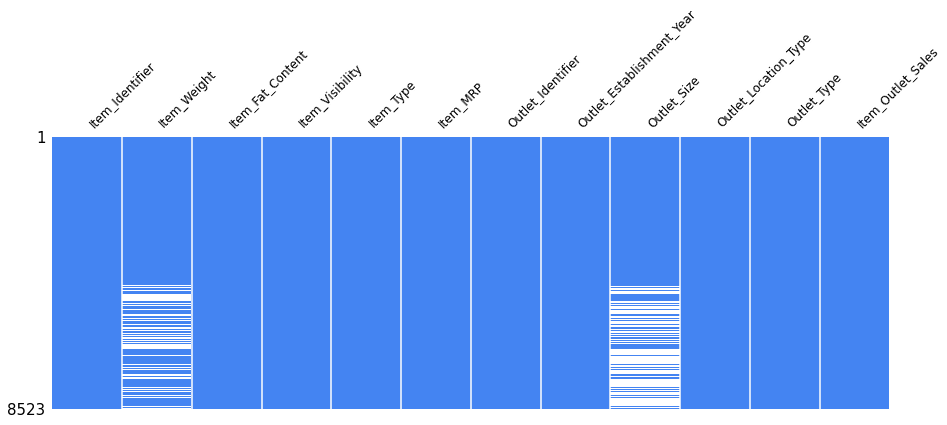

In [76]:
#The nullity matrix chart helps us understand the distribution of data within the whole dataset by column at the same time. 
msno.matrix(df, figsize = (15,5), fontsize = 12, color = [.27,.52,.95], sparkline = False, sort = 'descending');

We have identified that 2 columns with missing values:
- Item_Weight = 1463 missing values
- Outlet_Size = 2410 missing values

### 5. Decide on how to address the missing values. Explain your judgement and choice.

#### Outlet_Size Missing Values


Start off by evaluating which `Outlet_Type` and `Outlet_Location_Type`'s are missing `Outlet_Size` values.<sup>1</sup>

In [ ]:
# Group by the Outlet Type and Outlet Location Type to help determine a correlation within the missing Outlet Size values. 
df.groupby(['Outlet_Type','Outlet_Location_Type'])[['Outlet_Size']].apply(lambda x: x.isnull().sum())

Outlet_Size
Outlet_Type       Outlet_Location_Type             
Grocery Store     Tier 1                          0
                  Tier 3                        555
Supermarket Type1 Tier 1                          0
                  Tier 2                       1855
                  Tier 3                          0
Supermarket Type2 Tier 3                          0
Supermarket Type3 Tier 3                          0

With this data, we learn that only the following are missing values:
- `Outlet_Type`: Grocery Store with `Outlet_Location_Type`: Tier 3 is missing 555 values
- `Outlet_Type`: Supermarket Type 1 with `Outlet_Location_Type`: Tier 2 is missing 1855 values

##### Grocery Store Missing Values

Starting with the Grocery Store, Tier 2 is not present in the data which makes the missing Tier 3 data more suspicious.

Continuing to dig further into the Grocery Store type...

In [ ]:
# Create a store filter to find only Grocery Stores and list the Outlet_Sizes present in the data.
store_filter = df['Outlet_Type'] == 'Grocery Store'
df[store_filter].value_counts('Outlet_Size')

Outlet_Size
Small    528
dtype: int64

We can see that the only `Outlet_Size` for Grocery Stores is 'Small'. 

In [ ]:
# Use the store filter to find the Tiers of Outlet_Location_Types present in the data.
df[store_filter].value_counts('Outlet_Location_Type')

Outlet_Location_Type
Tier 3    555
Tier 1    528
dtype: int64

It is suspicious that outside of the missing values, only Tier 1 Grocery Stores are in our dataset. However, without further context to what the Tier's in `Outlet_Location_Type` are referencing, we will impute the 'Small' `Outlet_Size` to the missing values in that have Grocery Store as their `Outlet_Type`. 
<br>
<br>
We will be **not** updating the `Outlet_Location_Type` for Grocery Store's from Tier 3 to Tier 1 given the lack of understanding of the data dictionary explanation, "The type of area in which the store is located", even though there is no evidence of Tier 2 or 3 Grocery Store's being present in our data.

In [ ]:
# Run this first to verify the count of missing values 
df[store_filter]['Outlet_Size'].isna().sum()

555

In [ ]:
# Update null values with 'Small' with the Outlet_Type 'Grocery Store'
df.loc[store_filter & (df['Outlet_Size'].isnull()), 'Outlet_Size'] = 'Small'
df[store_filter]['Outlet_Size'].isna().sum()

0

##### Supermarket Type 1 Missing Values

We successfully updated the `Outlet_Size` for the missing values of Grocery Stores, now to move on to the Supermarket Type 1.

In [ ]:
# Create a store filter to find the Tiers of Outlet_Location_Types present in the data.
store_filter2 = df['Outlet_Type'] == 'Supermarket Type1'
df[store_filter2].value_counts('Outlet_Location_Type')

Outlet_Location_Type
Tier 2    2785
Tier 1    1860
Tier 3     932
dtype: int64

We can see that there are 930 Supermarket Type1's in a Tier 2 `Outlet_Location_Type` which gives us a good starting point to impute data to the missing values.

2785(total) - 1855(missing) = 930(non-null values)

In [ ]:
# Create a tier filter to find Tier 2
tier_filter = df['Outlet_Location_Type'] == 'Tier 2'

In [ ]:
# Apply the store filter2 and tier filter to the dataset and normalize the value counts.
df[tier_filter & store_filter2].value_counts('Outlet_Size', normalize = True)

Outlet_Size
Small    1.0
dtype: float64

We can see the 100% of the Supermarket Type1's in Tier 2 are 'Small' `Outlet_Size`'s, so it is likely that our missing values are 'Small' and can be imputed as such.

In [ ]:
# Run this first to verify the count of missing values 
df[store_filter2]['Outlet_Size'].isna().sum()

1855

In [ ]:
# Update null values with 'Small' with the Outlet_Type 'Supermarket Type1'
df.loc[store_filter2 & (df['Outlet_Size'].isnull()), 'Outlet_Size'] = 'Small'
df[store_filter]['Outlet_Size'].isna().sum()

0

#### Item_Weight Missing Values

**WORK IN PROGRESS**

In [41]:
df.duplicated(subset = ['Item_Identifier']).sum()

6964

In [90]:
df_new = df[['Item_Identifier', 'Item_Weight']].copy()
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Item_Identifier  8523 non-null   object 
 1   Item_Weight      7060 non-null   float64
dtypes: float64(1), object(1)
memory usage: 133.3+ KB


In [91]:
df_new.dropna(inplace = True)

In [93]:
df_new[df_new['Item_Identifier'] == id]['Item_Identifier'].count()

7

In [99]:
for id in df_new['Item_Identifier'].unique():
    if df_new[df_new['Item_Identifier'] == id]['Item_Identifier'].count() == df_new[df_new['Item_Identifier'] == id]['Item_Weight'].count():
        same_id = True
    else:
        same_id = False
    #same_id = df_new[df_new['Item_Identifier'] == id]['Item_Weight'].idxmax()
    df_new.loc[df_new['Item_Identifier'] == id, 'same'] = same_id

In [101]:
#df_new.info()
df_new['same'].sum()
#df_new.head()

7060

In [66]:
df_new['same'].sum()
df_new.to_csv(path_or_buf='Unique items.csv', index = True)

In [50]:
test = df.groupby(['Item_Type','Item_Identifier'])[['Item_Weight']].count()
test.to_csv(path_or_buf='Unique identifiers.csv', index = True)

`Item_Weight` will be more simple to impute values into as we can utilize the average values of the `Item_Types` to impute the missing values. 

We will begin by checking the total number of null values by each `Item_Type`. This is not required, but helps visualize how many values from each `Item_Type` are missing.<sup>2, 3, 4</sup>

In [ ]:
# Use a reverse subtraction to subtract the size of the dataframe by the count of values in the dataframe. All columns were confirmed to have 0, but we only want to display `Item_Weight`.
df.groupby('Item_Type').count().rsub(df.groupby('Item_Type').size(), axis = 0)[['Item_Weight']]

,Item_Weight
Item_Type,
Baking Goods,112
Breads,47
Breakfast,21
Canned,110
Dairy,116
Frozen Foods,138
Fruits and Vegetables,213
Hard Drinks,31
Health and Hygiene,90


We will be using the average weight of each `Item_Type` to fill in the missing `Item_Weight` values.

In [ ]:
# Filling null values by filling in the average weight per Item_Type.
df['Item_Weight'] = df['Item_Weight'].fillna(df.groupby('Item_Type')['Item_Weight'].transform('mean'))
df['Item_Weight'].isna().sum()

0

### 6. Confirm that there are no missing values after addressing them.

Using `df.isna().sum()` we will count up the total number of rows missing information from each column.

In [ ]:
# Identify missing values in each column
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### 7. Find and fix any inconsistent categories of data.

We will start off by using `df.info()` to make sure the datatypes of each column make sense.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Nothing sticks out as being out of the ordinary from our `df.info()`.

We can use `df[column].unique()` to look at the unique values present in each column. Suspect columns we should perform this on include: Item_Type, Item_Fat_Content, Outlet_Establishment_Year, Outlet_Size, Outlet_Location_Type, and Outlet_Type.
<br>
<br>
We can rule out a lot of this list given that we have already looked closely at the values in previous sections, which would leave us with **'Item_Fat_Content'** and **'Outlet_Establishment_Year'**.

In [ ]:
# Find the unique values contained within the Item_Fat_Content column.
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [ ]:
# Find the unique values contained within the Outlet_Establishment_Year column.
df['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004])

We see the `Outlet_Establishment_Year` has consistent data, however `Item_Fat_Content` has multiple strings that represent the same value. We can clean this up using `df.replace()`.

In [ ]:
# Use df['Item_Fat_Content'].replace() to replace the inconsistent data
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['low fat', 'LF'], 'Low Fat').replace('reg','Regular')
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

### 8. For any numerical columns, obtain the summary statistics of each.

Using `df.describe()` we will summarize the statistics for each numerical column.

In [ ]:
# Summarizes statistics for numerical columns
df.describe().round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00,8523.00,8523.00,8523.00,8523.00
mean,12.86,0.07,140.99,1997.83,2181.29
std,4.23,0.05,62.28,8.37,1706.50
min,4.56,0.00,31.29,1985.00,33.29
25%,9.31,0.03,93.83,1987.00,834.25
50%,12.87,0.05,143.01,1999.00,1794.33
75%,16.00,0.09,185.64,2004.00,3101.30
max,21.35,0.33,266.89,2009.00,13086.96


### Citations from Part 2
1. Referenced [Data Science Made Simple](https://www.datasciencemadesimple.com/check-count-missing-values-pandas-python-2/) to assist with question 5.
2. Referenced [Stack Overflow](https://stackoverflow.com/questions/53947196/groupby-class-and-count-missing-values-in-features) to assist with question 5.
3. Referenced [Pandas API](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rsub.html) to assist with question 5.
4. Referenced [Pandas API](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.size.html) to assist with question 5.


